## Section I. Introduction
The dataset chosen for this study is the [***"Pediatric Anemia Dataset: Hematological Indicators and Diagnostic Classification"***](https://data.mendeley.com/datasets/y7v7ff3wpj/1). This dataset contains hematological parameters used to support the diagnosis of anemia among patients.

Anemia is a medical condition characterized by a deficiency in healthy red blood cells or hemoglobin, which reduces the blood’s capacity to transport oxygen to body tissues. This condition remains a significant public health concern, particularly in tropical and subtropical regions. Early detection and appropriate treatment using hematological indicators such as hemoglobin level and red blood cell count are essential in addressing this condition.

With this, the goal of this study is to predict the clinical diagnostic outcome of anemia using demographic and hematological parameters. Therefore, the task is a binary classification task, where the model aims to classify patients into either: anemic or non-anemic. 

## Section II. Description of the Dataset
The dataset used in this study was obtained from the publicly available anemia clinical dataset published on [Mendeley Data](https://data.mendeley.com/datasets/y7v7ff3wpj/1). The data were collected from anemia patients in Aalok Healthcare Ltd., located in Dhaka, Bangladesh on October 9, 2023. 

Each row in the dataset represents a patients's record, and each corresponding column represent a specific attribute. The dataset consists of **1000 observations** and **8 features**, with an additional target variable (Decision_Class). 

The following are the description of each feature of the dataset:

- **`Gender`**: biological sex of the patient; `m` for male or `f` for female
- **`Age`**: age of the patient (years)
- **`Hb (hemoglobin)`**: measure of the blood's capacity to carry oxygen (g/dL)
- **`RBC (red blood cell count)`**: number of red blood cells per unit volume (million/μL)
- **`PCV (packed cell volume)`**: percentage of red blood cells in blood volume
- **`MCV (mean corpuscular volume)`**: average size of red blood cells (fL)
- **`MCH (mean corpuscular hemoglobin)`**: average hemoglobin content per red blood cell (pg/cell)
- **`MCHC (mean corpuscular hemoglobin concentration )`**: concentration of hemoglobin in red blood cells (g/dL)
- **`Decision_Class`**: binary indicator for the diagnostic outcome (0, 1)

## Import

In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

## Section III. Data Preparation

### Reading the Dataset
The first step is to load the dataset `anemia.csv`.

In [2]:
anemia_df = pd.read_csv('anemia.csv')

To quickly view the structure of the dataset, we use the function `head()`.

In [3]:
anemia_df.head(10)

,Gender,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class
0,f,32,10.9,4.26,34.2,80.2,25.5,31.8,1
1,f,45,9.6,3.64,29.9,82.1,26.4,32.2,1
2,f,38,10.1,3.70,32.4,87.6,27.4,31.3,1
3,m,37,11.0,3.93,33.6,85.3,27.9,32.7,1
4,f,50,12.1,4.16,36.5,87.9,29.2,33.2,0
5,f,40,10.4,3.59,30.4,84.5,27.7,32.7,1
6,f,32,6.8,1.99,15.4,77.4,24.0,31.0,1
7,m,18,11.6,4.06,35.5,87.4,28.6,32.8,1
8,m,38,12.0,4.38,36.3,82.8,27.5,33.2,0
9,f,50,11.7,4.35,36.6,84.0,26.9,32.0,1


In [4]:
anemia_df.shape

(1000, 9)

The loaded dataset information shows that the dataset contains **1,000 rows** and **9 columns**, confirming that the dataset has been loaded succesfully.

To improve readability and consistency, the dataset column names were renamed.

In [5]:
anemia_df = anemia_df.rename(columns={'Gender': 'gender', 
                              'Age': 'age', 
                              'Hb': 'hb', 
                              'RBC': 'rbc', 
                              'PCV': 'pcv', 
                              'MCV': 'mcv',
                              'MCH': 'mch',
                              'MCHC': 'mchc',
                              'Decision_Class': 'decision'})

### Data Cleaning

#### Checking multiple representations
To ensure consistent formatting, multiple representations of values in the **gender** column were checked. 
The values of the **gender** column were inspected using the `unique()` function to identify all existing categorical representations in the dataset.

In [6]:
anemia_df['gender'].unique()

<StringArray>
['f', 'm']
Length: 2, dtype: str

The output confirmed that gender was represented using two categories: 'f' for female and 'm' for male.

#### Checking data types
To check whether each variable is in the appropriate format, we use the `.dtypes`.

In [7]:
anemia_df.dtypes

gender          str
age           int64
hb          float64
rbc         float64
pcv         float64
mcv         float64
mch         float64
mchc        float64
decision      int64
dtype: object

In [8]:
anemia_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    1000 non-null   str    
 1   age       1000 non-null   int64  
 2   hb        1000 non-null   float64
 3   rbc       1000 non-null   float64
 4   pcv       1000 non-null   float64
 5   mcv       1000 non-null   float64
 6   mch       1000 non-null   float64
 7   mchc      1000 non-null   float64
 8   decision  1000 non-null   int64  
dtypes: float64(6), int64(2), str(1)
memory usage: 70.4 KB


The output shows that all variables are stored using appropriate and consistent data types. For discrete variables such as age and the target classification variable, the data are stored as integer values, while continuous hematological parameters are stored as floating-point values, and gender is stored as string values.

#### Handling missing values
To check for any missing values in our dataset, we use the `isnull()` function along with `sum`.

In [9]:
print(anemia_df.isnull().sum())

gender      0
age         0
hb          0
rbc         0
pcv         0
mcv         0
mch         0
mchc        0
decision    0
dtype: int64


The output shows there are **no missing values** in the dataset.

#### Handling duplicates
To check for any duplicate records, we use the `duplicated()` along with `sum`.

In [10]:
print(anemia_df.duplicated().sum())

28


The output showed that there were **28 duplicate records** in the dataset. To further examine these duplicate entries, we display all duplicated rows:

In [11]:
anemia_df[anemia_df.duplicated(keep=False)]

,gender,age,hb,rbc,pcv,mcv,mch,mchc,decision
10,f,30,11.4,5.51,35.4,64.3,20.6,32.1,1
15,f,30,11.4,5.51,35.4,64.3,20.6,32.1,1
207,f,49,10.8,3.62,27.9,77.0,26.7,34.7,1
208,f,45,10.9,4.36,31.8,72.9,25.0,34.3,1
209,f,52,11.8,4.37,34.9,80.0,27.1,33.9,1
210,f,49,10.8,3.62,27.9,77.0,26.7,34.7,1
211,f,45,10.9,4.36,31.8,72.9,25.0,34.3,1
212,f,52,11.8,4.37,34.9,80.0,27.1,33.9,1
224,f,29,11.1,3.57,29.5,82.7,31.2,37.8,1
225,f,20,11.9,4.34,32.2,74.1,27.4,37.0,1


Since duplicate records can affect model performance and analysis, the duplicate entries we'll be removed from the dataset.

In [12]:
anemia_df = anemia_df.drop_duplicates()

After removing duplicates, the dataset was rechecked to confirm that no duplicate records remained:

In [13]:
print(anemia_df.duplicated().sum())

0


The output confirmed that duplicate records were successfully removed.

In [14]:
anemia_df.info()

<class 'pandas.DataFrame'>
Index: 972 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    972 non-null    str    
 1   age       972 non-null    int64  
 2   hb        972 non-null    float64
 3   rbc       972 non-null    float64
 4   pcv       972 non-null    float64
 5   mcv       972 non-null    float64
 6   mch       972 non-null    float64
 7   mchc      972 non-null    float64
 8   decision  972 non-null    int64  
dtypes: float64(6), int64(2), str(1)
memory usage: 75.9 KB


The dataset now contains **972 unique patient records**. 

With the data cleaning process completed, we proceed to the exploratory data analysis (EDA) phase to examine data distributions and relationships between variables.

## Section IV. Exploratory Data Analysis (EDA)

In [15]:
gender = anemia_df['gender']
age = anemia_df['age']
hb = anemia_df['hb']
rbc = anemia_df['rbc']
pcv = anemia_df['pcv']
mcv = anemia_df['mcv']
mch = anemia_df['mch']
mchc = anemia_df['mchc']
decision = anemia_df['decision']

### A. Descriptive Statistics
Before visualizing the data, we examine the **descriptive analysis** of each feature to better understand its central tendency, spread, and range.

#### Age
The `age` variable represents the patient's age in years.

In [16]:
anemia_df['age'].describe().round(4)

count    972.0000
mean      40.9187
std       16.0336
min       18.0000
25%       28.0000
50%       38.0000
75%       51.2500
max       96.0000
Name: age, dtype: float64

The age of patients ranges from **18 to 96 years**, with a mean of approximately **41 years** and a standard deviation of ~16 years. The median (Q2) is close to the mean which could indicate a roughly symmetric distribution. The interquartile range (Q1–Q3) spans from **28 to 51 years**. Hence, majority of patients fall within a working-age adult range. 

#### Hb (Hemoglobin)
 - `hb` is the protein found in red blood cells that facilitates the transport of oxygen to the tissues. The normal reference range is 12 to 16 g/dL for females and 14 to 18 g/dL for males. [[x]](https://www.ncbi.nlm.nih.gov/books/NBK259/)

In [17]:
anemia_df['hb'].describe().round(4)

count    972.0000
mean      11.5662
std        1.3455
min        5.5000
25%       10.8000
50%       11.6000
75%       12.2000
max       15.8000
Name: hb, dtype: float64

Hemoglobin values range from **10.80 to 15.80 g/dL**, with a mean of approximately **11.56 g/dL** and a standard deviation of ~1.34 g/dL. The mean falls below the normal threshold for both sexes. The relatively low Q3 (~12.2 g/dL) further confirms that a large proportion of patients have clinically **low hemoglobin levels**.

#### RBC (Red Blood Cells)
- `rbc` measures the number of red blood cells per unit volume of blood. The normal reference range is 4.3-5.9 million/μL for males and 3.5-5.5 million/μL for females. [[x]](https://www.ncbi.nlm.nih.gov/books/NBK2263/table/ch1.T1/)

In [18]:
anemia_df['rbc'].describe().round(4)

count    972.0000
mean       4.1341
std        0.6001
min        1.4700
25%        3.7700
50%        4.1100
75%        4.4700
max        7.4100
Name: rbc, dtype: float64

RBC values range from **1.47 to 7.41 million/μL**, with a mean of approximately **4.13 million/μL** and a standard deviation of ~0.60. The minimum value of 1.47 is markedly low. The Q1 of ~3.77 million/μL indicates that at least 25% of patients have RBC counts below the margin or lower normal range.

#### PCV (Packed Cell Volume)
- `pcv` measures the percentage of blood volume occupied by red blood cells. The normal range is approximately 35–47% for females and 40–52% for males. [[x]](https://www.healthcare.uiowa.edu/path_handbook/rhandbook/test955.html)

In [19]:
anemia_df['pcv'].describe().round(4)

count    972.0000
mean      32.6622
std        4.8991
min       10.6000
25%       29.8000
50%       32.8000
75%       35.7250
max       49.5000
Name: pcv, dtype: float64

PCV values range from **10.6% to 49.50%**, with a mean of approximately **32.66%** and a standard deviation of ~4.90. The mean PCV falls below the normal lower bound for both sexes' range, again reflecting the anemic majority in the dataset. The minimum value of 15.4% represents a critically low level.

#### MCV (Mean Corpuscular Volume)
- `mcv` measures the average size of red blood cells in femtoliters (fL). The normal range is 80–100 fL; values below indicate microcytic and above indicate macrocytic red cells. [[x]](https://www.ncbi.nlm.nih.gov/books/NBK2263/table/ch1.T1/)

In [20]:
anemia_df['mcv'].describe().round(4)

count    972.0000
mean      79.2242
std        7.8101
min       29.6000
25%       75.2000
50%       80.7000
75%       84.5000
max      104.9000
Name: mcv, dtype: float64

MCV values range from **29.6 to 104.90 fL**, with a mean of approximately **79.22 fL** and a standard deviation of ~7.81. While the mean is within the normal range, the minimum of 59.7 fL indicates the presence of microcytic cases. The Q1 of ~75.20 fL suggests that at least 25% of patients have MCV below the normal lower bound. [[x]](https://my.clevelandclinic.org/health/diseases/23015-microcytic-anemia)

#### MCH (Mean Corpuscular Hemoglobin)
- `mch` is the average amount of hemoglobin per red blood cell. The normal range is 25.4-34.6 pg/cell. [[x]](https://www.ncbi.nlm.nih.gov/books/NBK2263/table/ch1.T1/)

In [21]:
anemia_df['mch'].describe().round(4)

count    972.0000
mean      28.1362
std        3.3508
min       13.3000
25%       26.3000
50%       28.7000
75%       30.4000
max       37.9000
Name: mch, dtype: float64

MCH values range from **13.30 to 37 pg/cell**, with a mean of approximately **28.14 pg/cell** and a standard deviation of ~3.35. The mean sits near the lower boundary of the normal range. While, the lower quartile (~26.0 pg/cell) shows that a significant portion of patients have below-normal MCH levels.

#### MCHC (Mean Corpuscular Hemoglobin Concentration)
- `mchc` measures the concentration of hemoglobin in red blood cells. The normal range is 32-36 g/dL. [[x]](https://emedicine.medscape.com/article/2054497-overview?form=fpf)

In [22]:
anemia_df['mchc'].describe().round(4)

count    972.0000
mean      35.4145
std        1.4229
min       25.3000
25%       34.9000
50%       35.7000
75%       36.3000
max       38.1000
Name: mchc, dtype: float64

MCHC values range from **25.30 to 38.10 g/dL**, with a mean of approximately **35.41 g/dL** and a standard deviation of ~1.42. The mean falls within the normal reference range. However, the minimum of 25.30 g/dL indicates probable hypochromic anemia (low mchc), while the maximum of 38.10 g/dL is above normal, which may suggest hyperchromic anemia cases. Among all hematological features, MCHC shows the smallest range.

### B. Target Variable Distribution

The target variable `decision` represents a binary indicator (1 for anemic; 0 for non-anemic) for the diagnostic outcome. To begin, we visualize the distribution of anemic and non-anemic cases in the dataset using a count plot. This provides a clear overview of the class distribution.


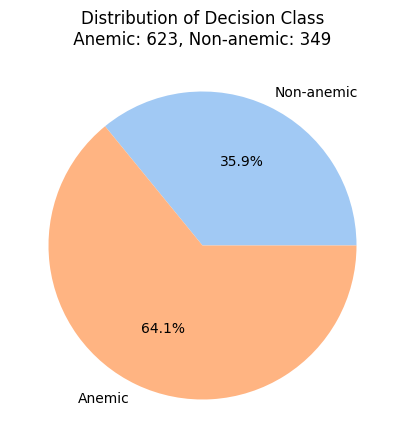

In [23]:
plt.figure(figsize=(5,5))

decision_counts = decision.value_counts().sort_index()

sns.set_palette('pastel')
plt.pie(decision_counts, labels=['Non-anemic', 'Anemic'], autopct='%.1f%%')

total_anemic = decision_counts.get(1)
total_non = decision_counts.get(0)
plt.title(f'Distribution of Decision Class\n Anemic: {total_anemic}, Non-anemic: {total_non} ')
plt.show()

The pie chart shows that **64.1%** of patients are classified as anemic (Decision Class = 1), while **35.9%** are non-anemic (Decision Class = 0). This confirms that the dataset is **imbalanced**, with Decison Class = 1 making up the majority. This imbalance is consistent with how the data was collected, since records were gathered from anemia patients at Aalok Healthcare Ltd., where vital signs and blood profiles were recorded at both diagnosis and follow-up visits to monitor disease progression.

### C. Demographic Distribution


#### Gender Distribution
The bar chart below will help view the distribution of patients by gender in the dataset.

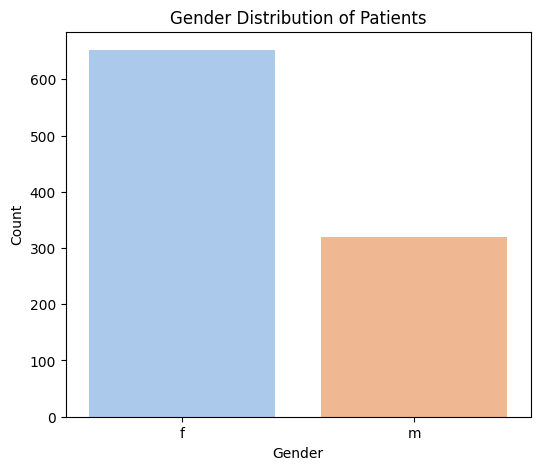

In [24]:
plt.figure(figsize=(6,5))

sns.countplot(data=anemia_df, x='gender', hue='gender', legend=False)
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

The count plot reveals that the dataset contains more **female** patients than **male** patients. This distribution reflects the clinical population from which the data was collected.

#### Age Distribution
The histogram below will help view the distribution of patient ages.

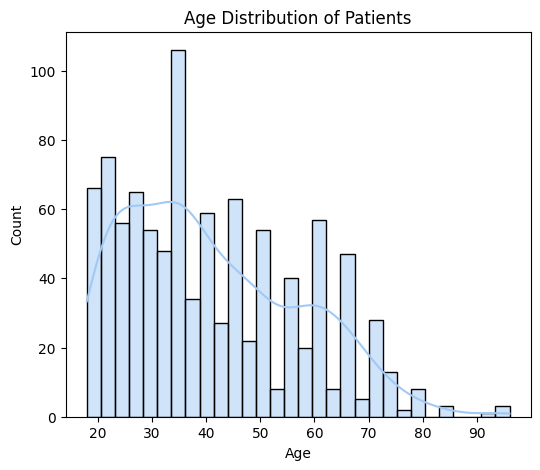

In [25]:
plt.figure(figsize=(6,5))

sns.histplot(data=anemia_df, x='age', bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

The age distribution histogram appears **right-skewed**, with most patients in the range of **20 and 60 years of age**. The KDE curve shows a concentration of patients in the middle-aged range, with fewer elderly patients represented in the dataset.

### D. Hematological Parameters Distributions

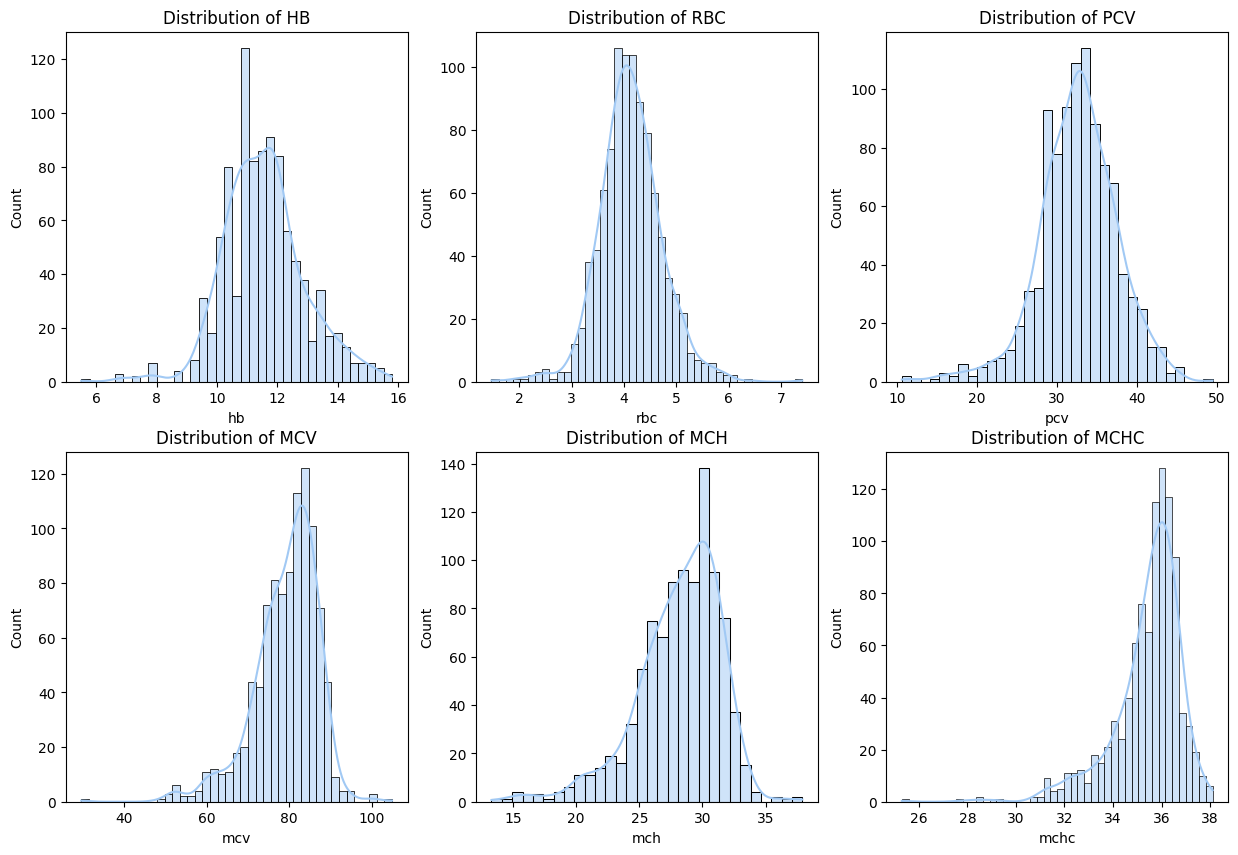

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

features = ['hb','rbc','pcv','mcv','mch','mchc']

for i, col in enumerate(features):
    ax = axes[i//3, i%3]
    sns.histplot(data=anemia_df, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col.upper()}')

plt.show()

The histograms reveal that most hematological parameters, including **Hb**, **RBC**, **PCV**, **MCV**, **MCH**, and **MCHC** display approximately normal or slightly skewed distributions. Some parameters, particularly **MCHC**, show a narrower distribution range which was consistent with the descriptive statistics from earlier (smallest range). Notable outliers are visible in certain features, which are clinically plausible among anemia patients rather than data entry errors. As such, these outliers were retained in the dataset for the following reasons: (1) removing them could result in the loss of important insights and (2) the number of flagged outliers is small relative to the total dataset size.

### E. Hematological Features by Decision Class

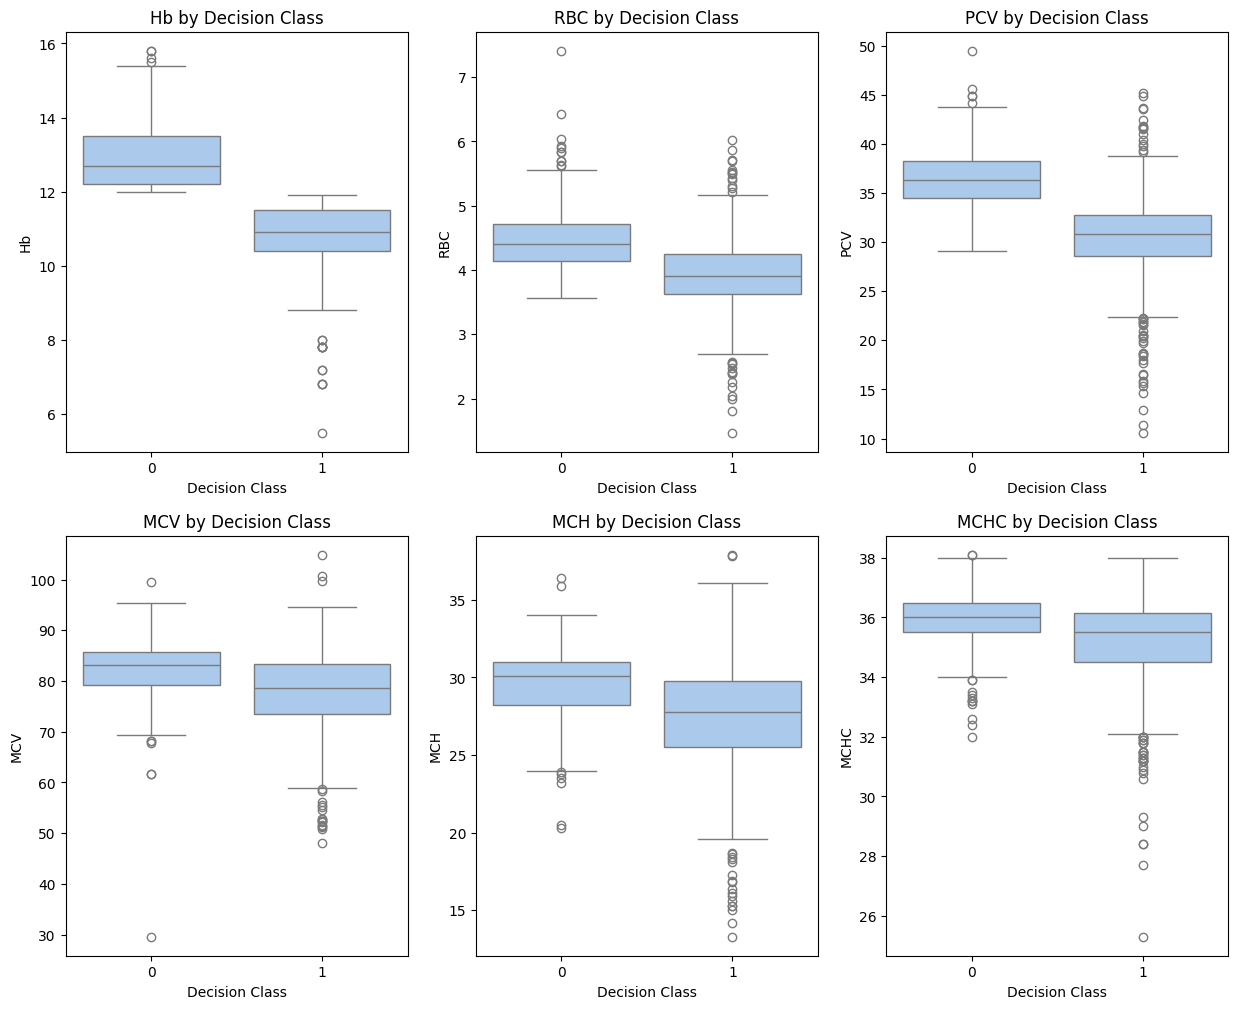

In [27]:
num_vars = [hb, rbc, pcv, mcv, mch, mchc]
num_labels = ['Hb', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC']

fig, axes = plt.subplots(2, 3, figsize=(15, 12))

axes = axes.flatten()

for i, (var, label) in enumerate(zip(num_vars, num_labels)):
    sns.boxplot(x=decision, y=var, ax=axes[i])

    axes[i].set_title(f'{label} by Decision Class')
    axes[i].set_xlabel('Decision Class')
    axes[i].set_ylabel(label)

plt.show()

The boxplots reveal clear differences in hematological parameters between anemic (1) and non-anemic (0) patients. **Hb**, **RBC**, and **PCV** are notably **lower** in anemic patients, which is clinically expected since anemia is characterized by reduced hemoglobin and red blood cell levels. **MCV** and **MCH** also tend to be lower in anemic cases, while **MCHC** shows a more subtle difference between the two classes. Overall, these findings suggest that most hematological features are useful inputs for the classification model.

### F. Demographic Relationships by Decision Class

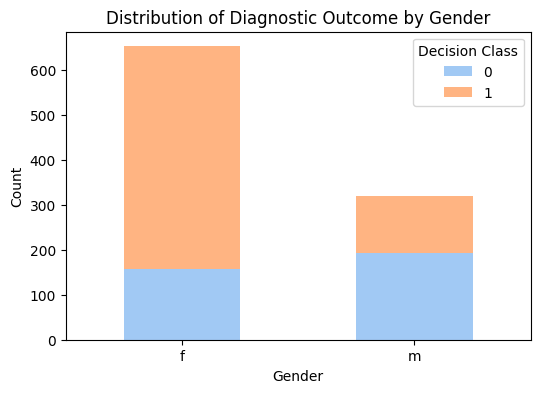

In [28]:
gender_decision = pd.crosstab(anemia_df['gender'], anemia_df['decision'])

gender_decision.plot(kind='bar', stacked=True, figsize=(6,4))

plt.title('Distribution of Diagnostic Outcome by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Decision Class')
plt.xticks(rotation=0)
plt.show()

The stacked bar chart shows that **anemia (Decision Class = 1) is more prevalent among female patients** compared to male patients. While males also show a proportion of anemic cases, the ratio of anemic to non-anemic patients is notably higher in females, which is consistent with studies indicating that females, particularly women of reproductive age, are at higher risk for anemia. [[x]](https://www.sciencedirect.com/science/article/pii/S2352340924011570)

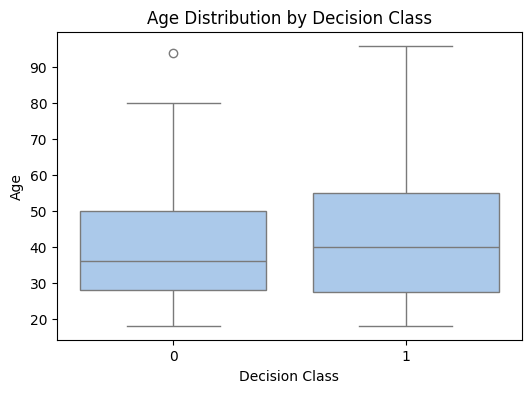

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(data=anemia_df, x='decision', y='age')
plt.title('Age Distribution by Decision Class')
plt.xlabel('Decision Class')
plt.ylabel('Age')
plt.show()

The boxplots for age distribution across decision classes show that both anemic and non-anemic patients span a **similar age range**, with the median age being comparable between the two groups. However, the anemic group (Decision Class = 1) displays slightly wider spread, with some younger and older outliers. This suggests that **age alone may not be a strong predictor** of anemia in this dataset.

### G. Correlation of Variables

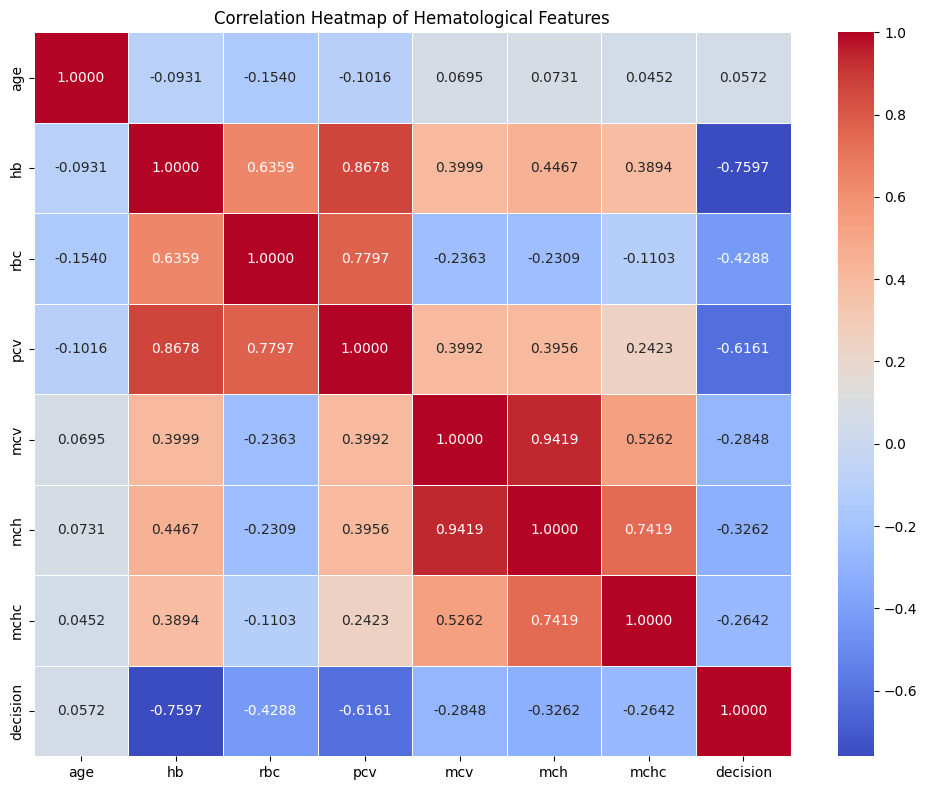

In [30]:
numeric_df = anemia_df.select_dtypes(include='number')

correlation = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.4f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Hematological Features')
plt.tight_layout()
plt.show()

The correlation heatmap reveals the linear relationships between all numerical features and the target variable (`decision`).

**Among hematological features**, **Hb**, **RBC**, and **PCV** exhibit strong positive intercorrelations (Hb-PCV: **0.8678**, RBC–PCV: **0.7797**, Hb–RBC: **0.6359**), which is expected as these three indices are directly related, a higher red blood cell count generally results in higher hemoglobin levels and packed cell volume [[x]](https://my.clevelandclinic.org/health/symptoms/17810-high-red-blood-cell-count). **MCV** and **MCH** also show a very strong positive correlation (**0.9419**), indicating that larger red blood cells tend to contain more hemoglobin [[x]](https://adscresources.advocatehealth.com/resources/mch-and-mcv/). **MCHC** shows moderate correlations with MCH (**0.7419**) and MCV (**0.5262**).

**Regarding the target variable**, the strongest negative correlations are observed with **Hb** (**-0.7597**), **PCV** (**-0.6161**), and **RBC** (**-0.4288**), confirming that lower values in these parameters are strongly associated with anemia (Decision Class = 1). **MCH** (**-0.3262**), **MCV** (**-0.2848**), and **MCHC** (**-0.2642**) show weaker negative correlations with the target. Notably, **age** shows a near-zero correlation with the target (**0.0572**), which further supports its limited predictive value and reinforces the decision to remove it during feature selection.

These findings are consistent with clinical understanding and confirm that **Hb**, **PCV**, and **RBC** are the most informative features for the classification task.

## Section V. Data preprocessing

### A. Binary Mapping

The `gender` column contains categorical string values (`'f'` for female, `'m'` for male). **Binary mapping** is applied to convert these values into numerical form by mapping `'f' → 0` and `'m' → 1`.

In [31]:
gender_scale = {'f': 0, 'm': 1}
anemia_df['gender'] = anemia_df['gender'].map(gender_scale)

anemia_df['gender']

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    1
998    0
999    0
Name: gender, Length: 972, dtype: int64

### B. Feature Scaling
Since the hematological features have different units and scales, normalization assure that we do not disproportionately influence the model. `sklearn.preprocessing.MinMaxScaler` is used to normalize the data. This scales each feature to a range of [0, 1].

In [32]:
scaler = sklearn.preprocessing.MinMaxScaler()

features_to_scale = ['hb', 'rbc', 'pcv', 'mcv', 'mch', 'mchc']

anemia_df[features_to_scale] = scaler.fit_transform(anemia_df[features_to_scale])

anemia_df.head()

,gender,age,hb,rbc,pcv,mcv,mch,mchc,decision
0,0,32,0.524272,0.469697,0.606684,0.671979,0.495935,0.507812,1
1,0,45,0.398058,0.365320,0.496144,0.697211,0.532520,0.539062,1
2,0,38,0.446602,0.375421,0.560411,0.770252,0.573171,0.468750,1
3,1,37,0.533981,0.414141,0.591260,0.739708,0.593496,0.578125,1
4,0,50,0.640777,0.452862,0.665810,0.774236,0.646341,0.617188,0


### C. Feature Selection

Aside from the exploratory data analysis, to support and statistically assess whether each feature has a statistically significant relationship with the target variable (`decision`), **SelectKBest** with the `f_classif` is applied. This method returns an **F-score** and **p-value** for each. Features with a **p-value > 0.05** are considered statistically insignificant and are considered to be removed before model training.

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

X = anemia_df.drop(columns='decision')
y = anemia_df['decision']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_.round(4),
    'P-Value': selector.pvalues_.round(4)
}).sort_values('P-Value')

feature_scores

,Feature,F-Score,P-Value
0,gender,137.0683,0.0000
2,hb,1324.1587,0.0000
3,rbc,218.5934,0.0000
4,pcv,593.5717,0.0000
6,mch,115.4814,0.0000
5,mcv,85.6088,0.0000
7,mchc,72.8164,0.0000
1,age,3.1872,0.0745


The results confirm the earlier EDA observation, `age` returned a p-value greater than 0.05, indicating that it does not have a statistically significant relationship with the diagnostic outcome. It is therefore dropped from the dataset prior to model training.

In [34]:
cols_to_drop = feature_scores[feature_scores['P-Value'] > 0.05]['Feature'].tolist()
print(f'Dropped features: {cols_to_drop}')

anemia_df = anemia_df.drop(columns=cols_to_drop)
print(f'Remaining features: {list(anemia_df.columns)}')

Dropped features: ['age']
Remaining features: ['gender', 'hb', 'rbc', 'pcv', 'mcv', 'mch', 'mchc', 'decision']


In [35]:
anemia_df

,gender,hb,rbc,pcv,mcv,mch,mchc,decision
0,0,0.524272,0.469697,0.606684,0.671979,0.495935,0.507812,1
1,0,0.398058,0.365320,0.496144,0.697211,0.532520,0.539062,1
2,0,0.446602,0.375421,0.560411,0.770252,0.573171,0.468750,1
3,1,0.533981,0.414141,0.591260,0.739708,0.593496,0.578125,1
4,0,0.640777,0.452862,0.665810,0.774236,0.646341,0.617188,0
...,...,...,...,...,...,...,...,...
995,0,0.475728,0.508418,0.457584,0.446215,0.321138,0.640625,1
996,1,0.796117,0.488215,0.699229,0.756972,0.735772,0.851562,0
997,1,0.640777,0.454545,0.588689,0.674635,0.634146,0.835938,0
998,0,0.650485,0.473064,0.588689,0.648074,0.621951,0.875000,0


### D. Train/Validation/Test Split
The dataset is split into **training (70%)**, **validation (15%)**, and **test (15%)** sets.

In [36]:
X = anemia_df.drop(columns='decision')
y = anemia_df['decision']

print('X ', X.shape)
print('y ', y.shape)

X  (972, 7)
y  (972,)


In [37]:
# First split: train (85%) and test (15%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)

In [38]:
# Second split: train (70%) and validation (15%) set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=1, stratify=y_train)

In [39]:
print('Training set (X_train):', X_train.shape)
print('Training set (y_train):', y_train.shape)

print('Validation set (X_val):', X_val.shape)
print('Validation set (y_val):', y_val.shape)

print('Test set (X_test):', X_test.shape)
print('Test set (y_test):', y_test.shape)

Training set (X_train): (680, 7)
Training set (y_train): (680,)
Validation set (X_val): (146, 7)
Validation set (y_val): (146,)
Test set (X_test): (146, 7)
Test set (y_test): (146,)
